In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def getFilesNewForY(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*Scene_classification*.tiff")
        file = files[0]
        #print(files)
        yield file

In [3]:
fileNamesY = list(getFilesNewForY("/tmp/shared/dataset4"))
fileNamesY

['/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/2/']


['/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/7/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/6/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/4/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/1/2022-11-14-00_00_2022-11-14-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/8/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff']

In [4]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [5]:
fileNamesX = list(getFilesNew("/tmp/shared/dataset4"))
fileNamesX

[['/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B08_(

In [6]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                s.append(f.read(1))
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [7]:
filesX_array = getFilesArrayNew(fileNamesX)

In [24]:
def getFilesArrayNewY(paths):
    l = []
    for i in paths:
        with rio.open(i,'r') as f:
            r = f.read(1)
            g = f.read(2)
            b =  f.read(3)
            rgb_arr = [r, g ,b]
            l.append(rgb_arr)
            # l.append(rgb)
    return l

In [37]:
_filexY_array = np.asarray(getFilesArrayNewY(fileNamesY))
#_filexY_array = np.moveaxis(_filexY_array, 1,0)
_filexY_array = np.asarray(_filexY_array * 255).astype(int)
_filexY_array.shape

(8, 3, 638, 1094)

In [38]:
__filesY_array  = []
for i in _filexY_array:
    r = i[0]
    g = i[1]
    b = i[2]
    rgb  = r
    rgb = np.left_shift(rgb, 8) + g
    rgb = np.left_shift(rgb, 8) + b
    __filesY_array.append(rgb)

In [39]:
filexY_array = np.asarray(__filesY_array)
filexY_array.shape

(8, 638, 1094)

In [40]:
unique_valsY = np.unique(filexY_array)
print(unique_valsY)
filexY_array[filexY_array == 1] = 100

[       0      255    40960  6566400  6605055  8421504 12632256 16770650
 16777215]


In [41]:
for idx, i in enumerate(unique_valsY):
        filexY_array [ filexY_array == i] = idx

In [42]:
print(np.unique(filexY_array))

[0 1 2 3 4 5 6 7 8]


In [44]:
x_np = np.asarray(filesX_array)
x_np.shape

(8, 12, 638, 1094)

In [45]:
x_np2 = x_np[:,:,0:608,0:1024]
x_np2.shape

(8, 12, 608, 1024)

In [46]:
x_np2 = np.moveaxis(x_np2,1,0)
x_np2.shape

(12, 8, 608, 1024)

In [47]:
x_np_combined = x_np2.reshape(12,-1,1024)

In [48]:
x_np_combined.shape

(12, 4864, 1024)

In [49]:
x_np_combined = np.moveaxis(x_np_combined, 0, -1)
x_np_combined.shape

(4864, 1024, 12)

In [50]:
x_data = x_np_combined.reshape(-1,32,32,12)

In [51]:
x_data.shape

(4864, 32, 32, 12)

In [52]:
filexY_array.shape

(8, 638, 1094)

In [53]:
y_np =  filexY_array[:,0:608,0:1024]
y_np.shape

(8, 608, 1024)

In [54]:
y_np2 = y_np.reshape(-1, 1024)
y_np2.shape

(4864, 1024)

In [55]:
y_data = y_np2.reshape(-1, 32,32)
y_data.shape

(4864, 32, 32)

In [56]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [57]:
y_cat = np_utils.to_categorical(y_data)

In [162]:
model_new = tf.keras.models.Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,12)),
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,12)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3), padding='same'),
    Conv2D(64,(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    Dropout(0.7),

    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    Conv2D(128,(3,3), padding='same'),
    Conv2D(128,(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Flatten(),
    Dense(128),
    Activation('relu'),
    Dropout(0.7),
    #Reshape((4,4,128)),
    UpSampling2D((2,2)),
    Conv2D(128,(3,3), padding='same'),
    Conv2D(128,(3,3), padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.7),
    Conv2D(64,(3,3), padding='same'),
    Conv2D(64,(3,3), padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.7),
    Conv2D(32,(3,3), padding='same'),
    Conv2D(32,(3,3), padding='same'),
    Activation('relu'),
    Conv2D(9,3,padding='same'),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Activation('softmax'),
])

In [163]:
model_new.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [164]:
model_new.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 32, 32, 32)        3488      
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_80 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [127]:
es = EarlyStopping(monitor='val_loss')
mc = ModelCheckpoint('best_model_new.h5', monitor='val_loss')
cb = [es,mc]

In [165]:
history2 = model_new.fit(x_data, y_cat, epochs=100,batch_size=16, validation_split=0.2)

Epoch 1/100
244/244 [==============================] - 6s 19ms/step - loss: 0.7581 - accuracy: 0.6433 - val_loss: 0.7558 - val_accuracy: 0.6615
Epoch 2/100
244/244 [==============================] - 4s 16ms/step - loss: 0.5427 - accuracy: 0.7685 - val_loss: 0.6319 - val_accuracy: 0.7309
Epoch 3/100
244/244 [==============================] - 4s 16ms/step - loss: 0.5045 - accuracy: 0.7850 - val_loss: 0.5568 - val_accuracy: 0.7940
Epoch 4/100
244/244 [==============================] - 4s 15ms/step - loss: 0.4811 - accuracy: 0.7955 - val_loss: 0.5252 - val_accuracy: 0.7954
Epoch 5/100
244/244 [==============================] - 4s 16ms/step - loss: 0.4726 - accuracy: 0.8002 - val_loss: 0.6698 - val_accuracy: 0.7337
Epoch 6/100
244/244 [==============================] - 4s 15ms/step - loss: 0.4574 - accuracy: 0.8066 - val_loss: 0.5000 - val_accuracy: 0.7918
Epoch 7/100
244/244 [==============================] - 4s 15ms/step - loss: 0.4531 - accuracy: 0.8091 - val_loss: 0.5116 - val_accuracy:

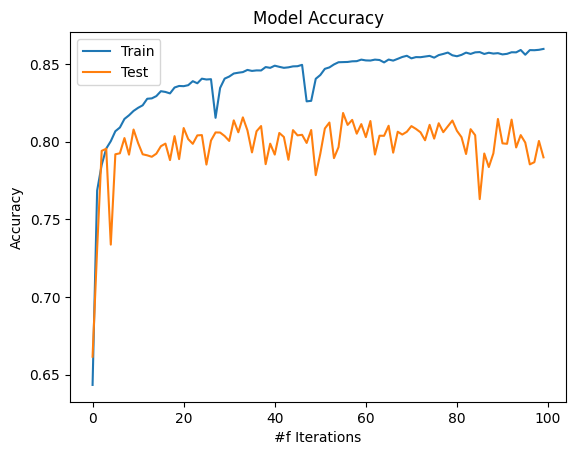

In [166]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [167]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/dataset4/2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B12_(Raw).tiff',

In [168]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [169]:
arr_st = np.stack(l)

In [170]:
arr_st.shape

(12, 638, 1094)

In [171]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(638, 1094, 12)

In [172]:
x1_v = x.shape[0]%32
x1_h = x.shape[1]%32
res1 = x.shape[0]-x1_v
res2 = x.shape[1]-x1_h
xx = x[0:(x.shape[0]-x1_v),0:(x.shape[1]-x1_h),:]

In [173]:
x_rr = xx.reshape(-1, 32,32,12)

In [174]:
prediction = model_new.predict(x_rr,batch_size=16)

41/41 [==============================] - 1s 10ms/step


In [175]:
pred_cat = np.argmax(prediction,axis=3)
pred_cat.shape

(646, 32, 32)

In [176]:
pred_pxl = pred_cat.reshape(res1,res2)

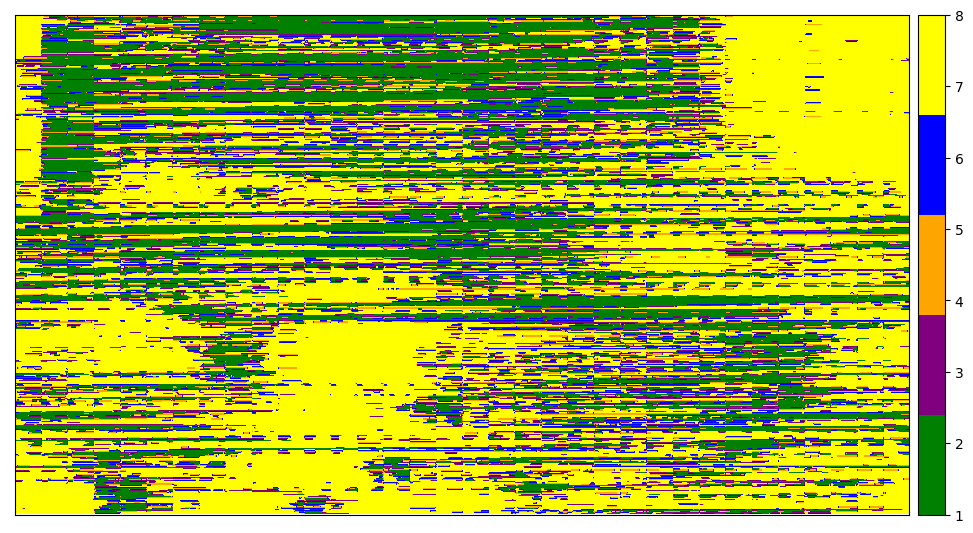

<AxesSubplot:>

In [177]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [178]:
Check_images = glob("/tmp/shared/dataset4/1/*Scen*.tiff")
Check_images

['/tmp/shared/dataset4/1/2022-11-14-00_00_2022-11-14-23_59_Sentinel-2_L2A_Scene_classification_map.tiff']

In [179]:
from IPython.display import Image
Image(filename=Check_images[0])

ValueError: Cannot embed the 'tiff' image format

In [96]:
# import cv2
#
# gray = cv2.imread("path/to/tiff/0.tiff", cv2.IMREAD_UNCHANGED)
#
# cv2.namedWindow("MyImage", cv2.WINDOW_NORMAL)
# cv2.imshow("MyImage", gray)
# cv2.waitKey(0)

ModuleNotFoundError: No module named 'cv2'